<a href="https://colab.research.google.com/github/lumizel/AI_26/blob/main/04_02_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# MBC 마켓에 럭키백 성공으로 인해서 각각의 지역에서 수산물을 제공하기로 하였다

# 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라
# 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공하고 있다.
# 하지만, 수산물을 제공한다는 곳이 너무 많아서
# 샘플을 골라내는 일이 너무 힘들다. 추가되는 수산물의 샘플도 없다.

# 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.

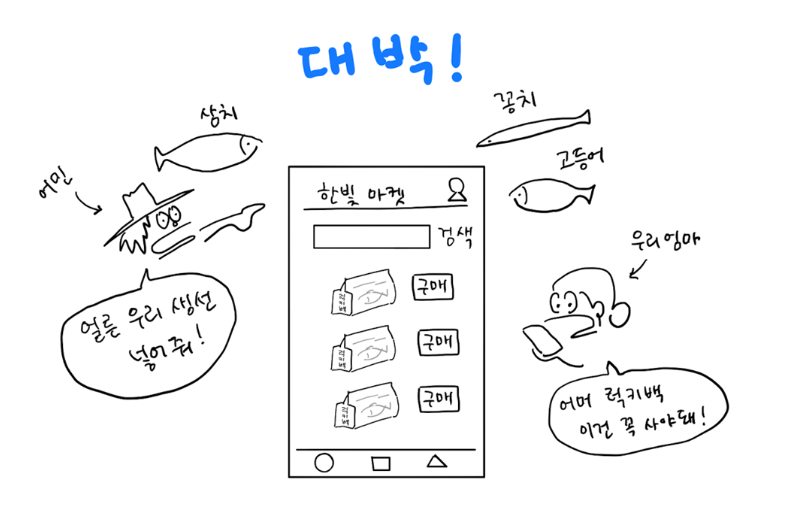

In [3]:
# 점진적 학습

# 당면한문제 : 훈련데이터가 한번에 준비되는 것이 아니라, 조금씩 전달됨
# 해결법1 : 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시훈련
#   단점1 : 시간이 지날 수록 데이터가 늘어남
#          -> 인력추가, 서버증설, 시간적여유가 줄어듬 -> 지속 가능할까?

# 해결법2 : 새로운데이터를 추가할 때마다 이전 데이터를 버림
#         , 훈련데이터 크기를 일정하게 유지하는 방법
#   단점2 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 데이터가 포함되면???

# 해결법3 : 점진적 학습 방법
# (온라인 학습, 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터를 학습)
#  -> 확률적 경사 하강법

In [4]:
# 확률적 경사 하강법 (실제 산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤(훈련 세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 내려감
# 위 방법을 반복수행
# 만약 모든 샘플을 다 사용해도 다 내려오지 못할 경우
#   처음부터 다시 시작함
#   훈련세트에 모든 샘플을 다시 채워 넣음
#   다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달 할 때까지 계속 내려감
# 훈련세트를 한번 모두 사용하는 과정을 에포크(epoch)라고 함
#   일반적인 경사하강법은 수십, 수백번 이상 에포크를 수행함
# 만약, 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때 집으로 돌아가려면
# 등산로의 입구까지 내려가야 한다.
# 만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는것이 최선임
# 가장 빠른 길은 경사가 가장 가파른 길!!!!

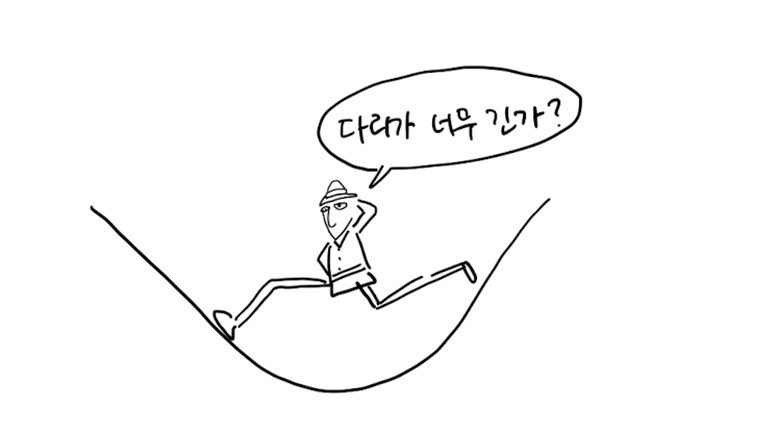

In [5]:
# 실제로 산에서 내려올 때는 천천히 내려와야한다 -> 경사 하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요 -> 훈련볍
# 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것.
# 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾은
# -> 확률적
# 결론 : 후녈ㄴ세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금 씩 내려간 다음 훈련세트에서
# 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감 -> 전체 샘플을 모두 사용할 때 까지 진행.

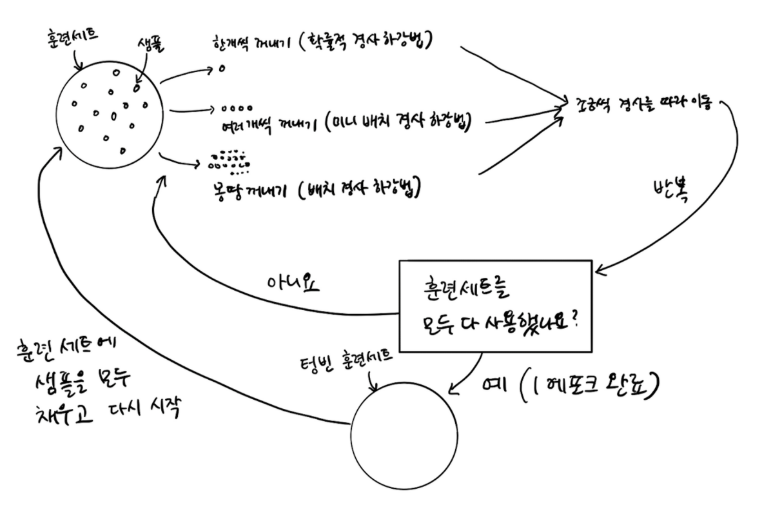

In [6]:
# 위 방법대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
# 이러한 문제점을 해소하려고 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
    # 미니 배치 경사하강법 : 여러개의 샘플을 사용해서 경사하강진행
    # 배치 경사하강법 : 극단적으로 한번 경사를 따라 이동(전체 샘플사용)
        # 단점 : 컴퓨터 자원을 너무 많이 사용한다.
        # 한번에 전체 데이터를 모두 읽을 수 없을 수 있다.
# 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 이어나갈수 있다.
# 다시 산꼭대기 부터 시작할 필요가 없다 -> 신경망 알고리즘을 사용한다.

# 손실 함수(Loss function) -> 머신런닝 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음)
#                          -> 하지만 어떤 값이 최소값인지 알지 못함.
#                          -> 가능한 많이 찾아보고 만족할 만한 수준이면 인정해야 함
#                          -> 이 값을 찾아서 조금씩 이동
# 손실 함수 공식 : Loss = −log(p)  -> p = 모델이 "1"이라고 예측한 확률

# 비용 함수(Cost function) -> 손실함수의 다른말. (손실함수는 샘플 하나에 대한 손실을 정의)
#                          -> 비용함수는 훈련세트에 있는 모든 샘플에 대한 손실함수의 합

# 분류에서 손실은 정답을 못 맞히는 것!

# 에포크(epoch : 시대) -> 훈련세트를 한번 모두 사용하는 과정

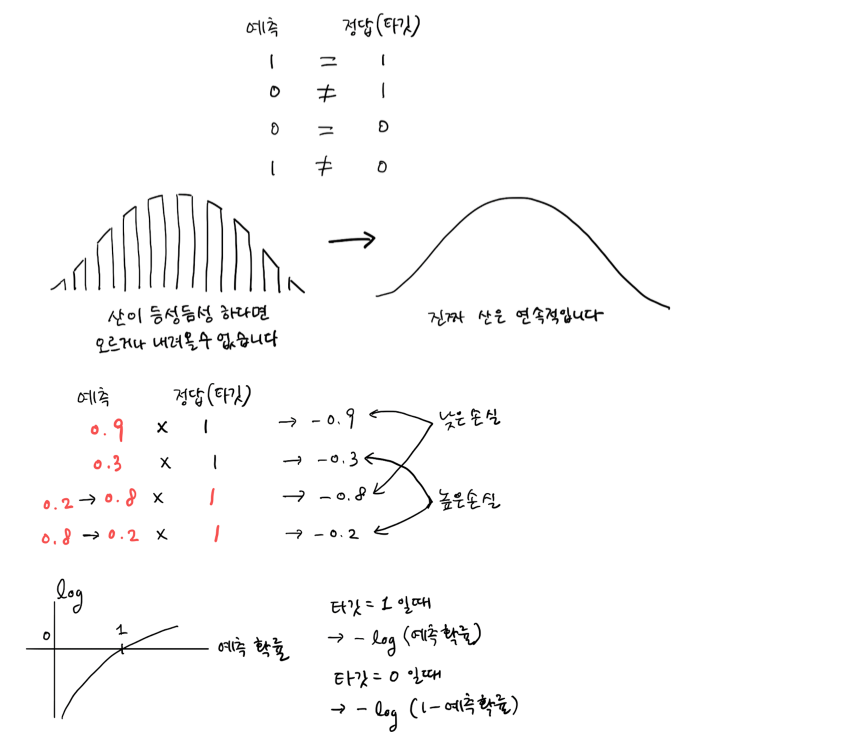

In [7]:
# 정답이 1인데
# 모델이 높은 확률(0.9,0.8)로 맞추면 -> 손실이 작다
# 모델이 낮은 확률(0.3,0.2)로 맞추면 -> 손실이 크다

# 로그값은 0~1 사이에서 항상 음수이기 때문에
# log(0.9) ≈ -0.1
# log(0.2) ≈ -1.6
# 그래서 손실은 앞에 마이너스를 붙여서 양수로 바꿈

In [8]:
import pandas as pd
import requests
import io
import urllib3


# 1. "보안 검증 안 해도 되니까 경고 띄우지 마!" 설정
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
# 2. requests로 데이터를 강제로 가져오기 (verify=False가 핵심)
url = 'https://bit.ly/fish_csv_data'
response = requests.get(url, verify=False)


# 3. 판다스에게 주소 대신 '이미 가져온 데이터'를 읽으라고 시키기
# pd.read_csv('https://...') 대신 아래 방식을 써야 에러가 안 납니다!
fish = pd.read_csv(io.StringIO(response.text))

fish.head()  # fish에 있는 리스트 위에 5개 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# Species-어종을 제외한 나머지 필드를 fish_input 변수에 리스트로 넣음
fish_target = fish['Species'].to_numpy() # 어종을 정답파일로 생성
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [10]:
from sklearn.model_selection import train_test_split

import numpy as np
np.set_printoptions(precision=6,suppress=True) # 하다넹 표준점수 변환용에서 사용함
#                    소수점 6자리
#                               suppress=True -> 과학적 표기법 (지수표기) 사용 안함

# 사이킷런을 이용해서 훈련잔료와 테스트 자료 나눔
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)
print('train_input')
print(train_input)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [11]:
print(train_input.shape)


(119, 5)


In [12]:
print('test_input')
print(test_input)

test_input
[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       

In [13]:
print(test_input.shape)

(40, 5)


In [14]:
# 훈련용 119개 5특성 테스트용 40개 5개 특성

# 정답리스트
print('train_target : ' + train_target) # 훈련정답 119개

['train_target : Bream' 'train_target : Pike' 'train_target : Smelt'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Roach'
 'train_target : Perch' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Perch' 'train_target : Bream'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Perch'
 'train_target : Bream' 'train_target : Smelt' 'train_target : Perch'
 'train_target : Roach' 'train_target : Bream' 'train_target : Pike'
 'train_target : Bream' 'train_target : Pike' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Bream' 'train_target : Perch'
 'train_target : Pike' 'train_target : Bream' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Roach' 'train_target : Pike'
 'train_target : Perc

In [15]:
print(test_target)# 테스트 정답 40개

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [16]:
from sklearn.preprocessing import StandardScaler
# 훈련세트와 테스트 세트의 특성을 표준화 전처리함(표준점수로 처리)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [17]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [18]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss='log_loss' : 로지스틱 손실 함수 지정
# max_iter=10 : 10회 에포크 반복 (전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) # 학습 시작

print(sc.score(train_scaled, train_target)) # 77.31 %
print(sc.score(test_scaled, test_target))   # 77.5 %  -> 반복횟수 부족으로 max_iter를 향상후 훈련

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [19]:
# 확룰적 경사 하강법은 점진적 학습이 가능하다라고 했음
# SGDClassifier 객체를 또 만들지 말고 훈련한 모델을 sc로 후가하여 훈련을 추가한다
sc.partial_fit(train_scaled, train_target) # 부분적인 학습 partial

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 퍼센트가 증가 함 -> 무작정 부분적인 학습을 계속하는 것은 의미가 없음 -> 기준점을 제공해야 함
# 현재는 등산 내려오다가 정지된 느낌

0.7983193277310925
0.775


In [20]:
# 에포크의 과대/과소적합
# 확률적 경사 하강법을 사용한 모델은 에코프 횟수에 따라 과소/과대 적합 문제 발생
# 에포크 횟수가 적으면 훈련 덜 함 (119개에서 10번만 랜덤추출(학습)하고 정지)
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다

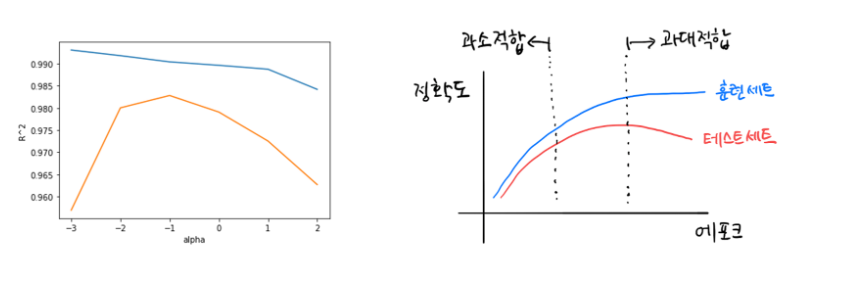

In [21]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련,테스트 세트와 맞지 않음 - 과소적합
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트 세트는 점수가 나쁨 - 과대적합

# 과대 적합이 되기 전에 훈련을 멈추는 것 - 조기 종료

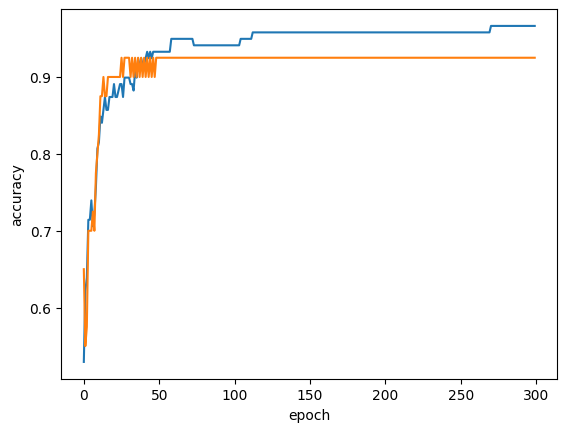

In [22]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []
# train_target에 있는 7개의 생선목롤을 제공
classes = np.unique(train_target)

# 파이썬의 _ 변수는 1회용
for _ in range(0,300) : # 300번의 에포크 동안 훈련 진행
    sc.partial_fit(train_scaled,train_target,classes=classes)
    # 훈련을 부분적으로 학습

    # 반복마다 훈련세트와 테스트 세트의 점수를 계산하여 위에 리스트 2개에 각각 추가함
    train_score.append(sc.score(train_scaled, train_target)) # 훈련세트 점수를 빈 리스트에 추가
    test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 점수를 빈 리스트 추가

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [23]:
# 결론 에포크 횟수를 100번 정도 돌리니 차트상으로 과대/과소적합이 아님
sc = SGDClassifier(loss='log_loss', max_iter=100,tol=None,random_state=42) # tol = None 조기 종료 안함
# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [24]:
sc.predict(test_scaled[:5])

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [25]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [26]:
# 손실함수에 대한 loss 매개변수
# loss 매개값의 기본값은 loss=hinge (힌지 손실) -> 서포트 백터머신(SVM)이라고 불림
# SVM : 두 클래스를 가장 멀리 떨어지게 나누는 경계를 찾는 알고리즘
# 데이터를 선 하나로 나눈다고 생각해보자 여러 개의 선을 그릴 수 있지만 SVM은 이런 선을 고릅니다
# 두 클래스 사이의 간격(마진)이 가장 넓은 선

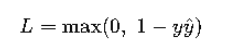

In [27]:
# loss='hinge'는 또 다른 머신러닝 알고리즘을 위한 손실 함수
# hinge 손실은 단수히 맞추는 게 아니라 결정 경계에서 충분히 멀리 떨어져 맞추길 원한다.
# '가장 안전하게 나누는 선'을 찾는 알고리즘

sc_hinge = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc_hinge.fit(train_scaled, train_target)

print(sc_hinge.score(train_scaled, train_target))
print(sc_hinge.score(test_scaled, test_target))

0.9495798319327731
0.925


In [28]:
sc_hinge.predict(test_scaled[:5]) # Perch Smelt Pike Perch Perch
# 단 힌지 손실함수는 predict_proba() 지원 x
# proba = sc_hinge.predict(test_scaled[:5])
# np.round(proba, decimals=3)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [29]:
sc_hinge.partial_fit(train_scaled, train_target)
print(sc_hinge.score(train_scaled, train_target))
print(sc_hinge.score(test_scaled, test_target))

0.907563025210084
0.925


In [30]:
from sklearn.metrics import hinge_loss

train_score = []
test_score = []
train_loss = []
test_loss = []

classes = np.unique(train_target)

sc_hinge_test = SGDClassifier(loss='hinge', max_iter=1, tol=None, random_state=42)

for _ in range(300):
    sc_hinge_test.partial_fit(train_scaled, train_target, classes=classes)

    # accuracy
    train_score.append(sc_hinge_test.score(train_scaled, train_target))
    test_score.append(sc_hinge_test.score(test_scaled, test_target))

    # loss
    train_decision = sc_hinge_test.decision_function(train_scaled)
    test_decision = sc_hinge_test.decision_function(test_scaled)

    train_loss.append(hinge_loss(train_target, train_decision))
    test_loss.append(hinge_loss(test_target, test_decision))

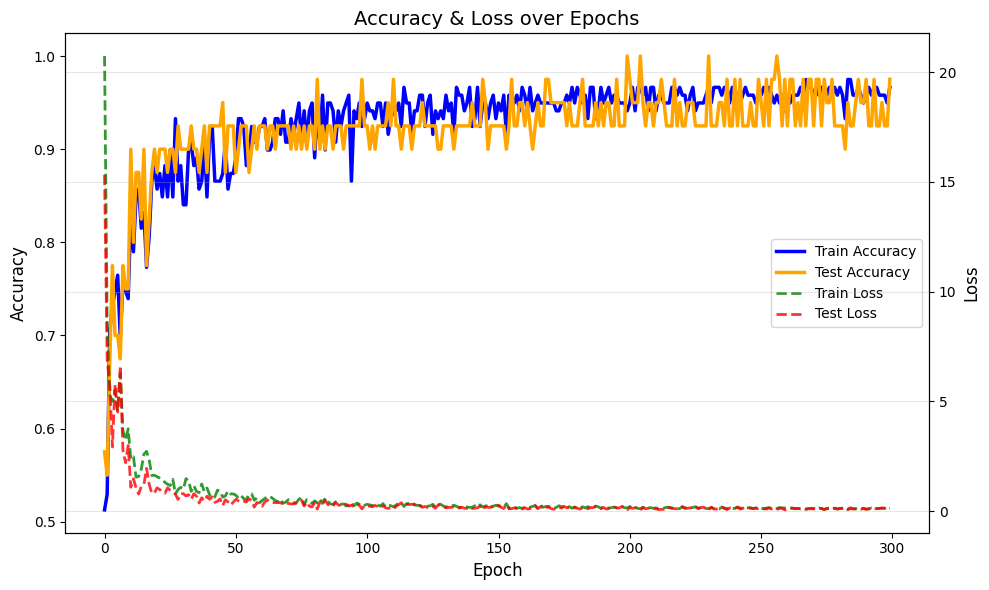

In [31]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy (왼쪽 축)
ax1.plot(train_score,
         color='blue',
         linewidth=2.5,
         label='Train Accuracy')

ax1.plot(test_score,
         color='orange',
         linewidth=2.5,
         label='Test Accuracy')

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.tick_params(axis='y')

# Loss (오른쪽 축)
ax2 = ax1.twinx()

ax2.plot(train_loss,
         color='green',
         linestyle='--',
         linewidth=2,
         alpha=0.8,
         label='Train Loss')

ax2.plot(test_loss,
         color='red',
         linestyle='--',
         linewidth=2,
         alpha=0.8,
         label='Test Loss')

ax2.set_ylabel('Loss', fontsize=12)

# 범례 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title('Accuracy & Loss over Epochs', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 조기종료 지점 찾아보기 (Early Stopping)
# test loss가 가장 낮은 epoch 또는 test loss가 patience 횟수만큼 연속 증가하면 멈춤
# minL(test) : test loss가 더 이상 감소하지 않는 시점을 찾습니다.

In [32]:
patience = 10
best_loss = float('inf')
patience_counter = 0
early_stop_epoch = 0

train_score_early = []
test_score_early = []
train_loss_early = []
test_loss_early = []

sc_hinge_test_early = SGDClassifier(loss='hinge', max_iter=1, tol=None, random_state=42)

for epoch in range(300):
    sc_hinge_test_early.partial_fit(train_scaled, train_target, classes=classes)

    # accuracy 저장
    train_score_early.append(sc_hinge_test_early.score(train_scaled, train_target))
    test_score_early.append(sc_hinge_test_early.score(test_scaled, test_target))

    # loss 계산
    train_decision_early = sc_hinge_test_early.decision_function(train_scaled)
    test_decision_early = sc_hinge_test_early.decision_function(test_scaled)

    current_test_loss = hinge_loss(test_target, test_decision_early)
    train_loss_early.append(hinge_loss(train_target, train_decision_early))
    test_loss_early.append(current_test_loss)

    # Early Stopping 체크
    if current_test_loss < best_loss:
        best_loss = current_test_loss
        patience_counter = 0
        early_stop_epoch = epoch
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

Early stopping at epoch 23


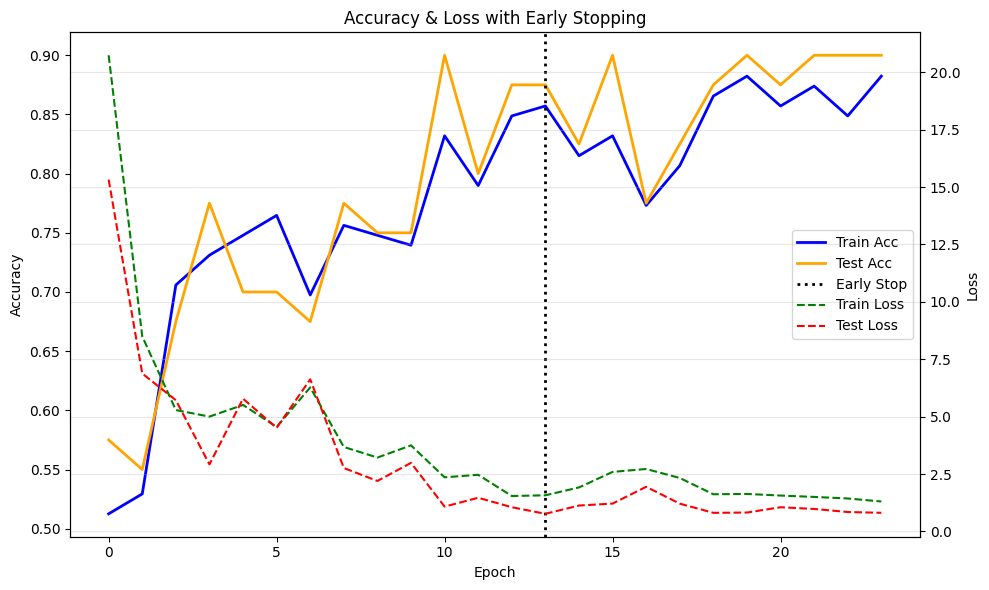

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy
ax1.plot(train_score_early, color='blue', linewidth=2, label='Train Acc')
ax1.plot(test_score_early, color='orange', linewidth=2, label='Test Acc')

# Early stopping 세로선
ax1.axvline(x=early_stop_epoch,
            color='black',
            linestyle=':',
            linewidth=2,
            label='Early Stop')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

# Loss
ax2 = ax1.twinx()
ax2.plot(train_loss_early, color='green', linestyle='--', label='Train Loss')
ax2.plot(test_loss_early, color='red', linestyle='--', label='Test Loss')
ax2.set_ylabel('Loss')

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title('Accuracy & Loss with Early Stopping')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()